# Docker Crash Course

#### Virtual Machine?
A virtual machine (VM) is an emulation of a computer system. A virtual version of a real machine.
It makes it possible to run what appear to be many separate computers on hardware that is actually one computer. Meaning, you can run many virtual machines on one larger server. What enables the VMs to work is a piece of software called a _hypervisor_.


#### Hypervisor?
The servers would need to execute the _hypervisor_. The _hypervisor_, in turn, loads the client operating systems of the virtual machines. The hypervisor allocates the correct CPU resources, memory, bandwidth and disk storage space for each virtual machine.

A virtual machine can create requests to the _hypervisor_ through a variety of methods, including API calls.

:VMs: can run their own programs and will appear to be using the host’s hardware. However, it’s actually the Hypervisor that’s allocating resources to the _VM_.

#### Features of VMs

**Benefits of VMs**
- All OS resources available to apps.
- Established management tools.
- Established security tools.
- Better known security controls.

VMs, however, can take up a lot of system resources. Each VM runs not just a full copy of an operating system, but a virtual copy of all the hardware that the operating system needs to run. This quickly adds up to a lot of RAM and CPU cycles. That’s still economical compared to running separate actual computers, but for some applications it can be overkill, which led to the development of containers.

[vm-layers.png](attachment:vm-layers.png)
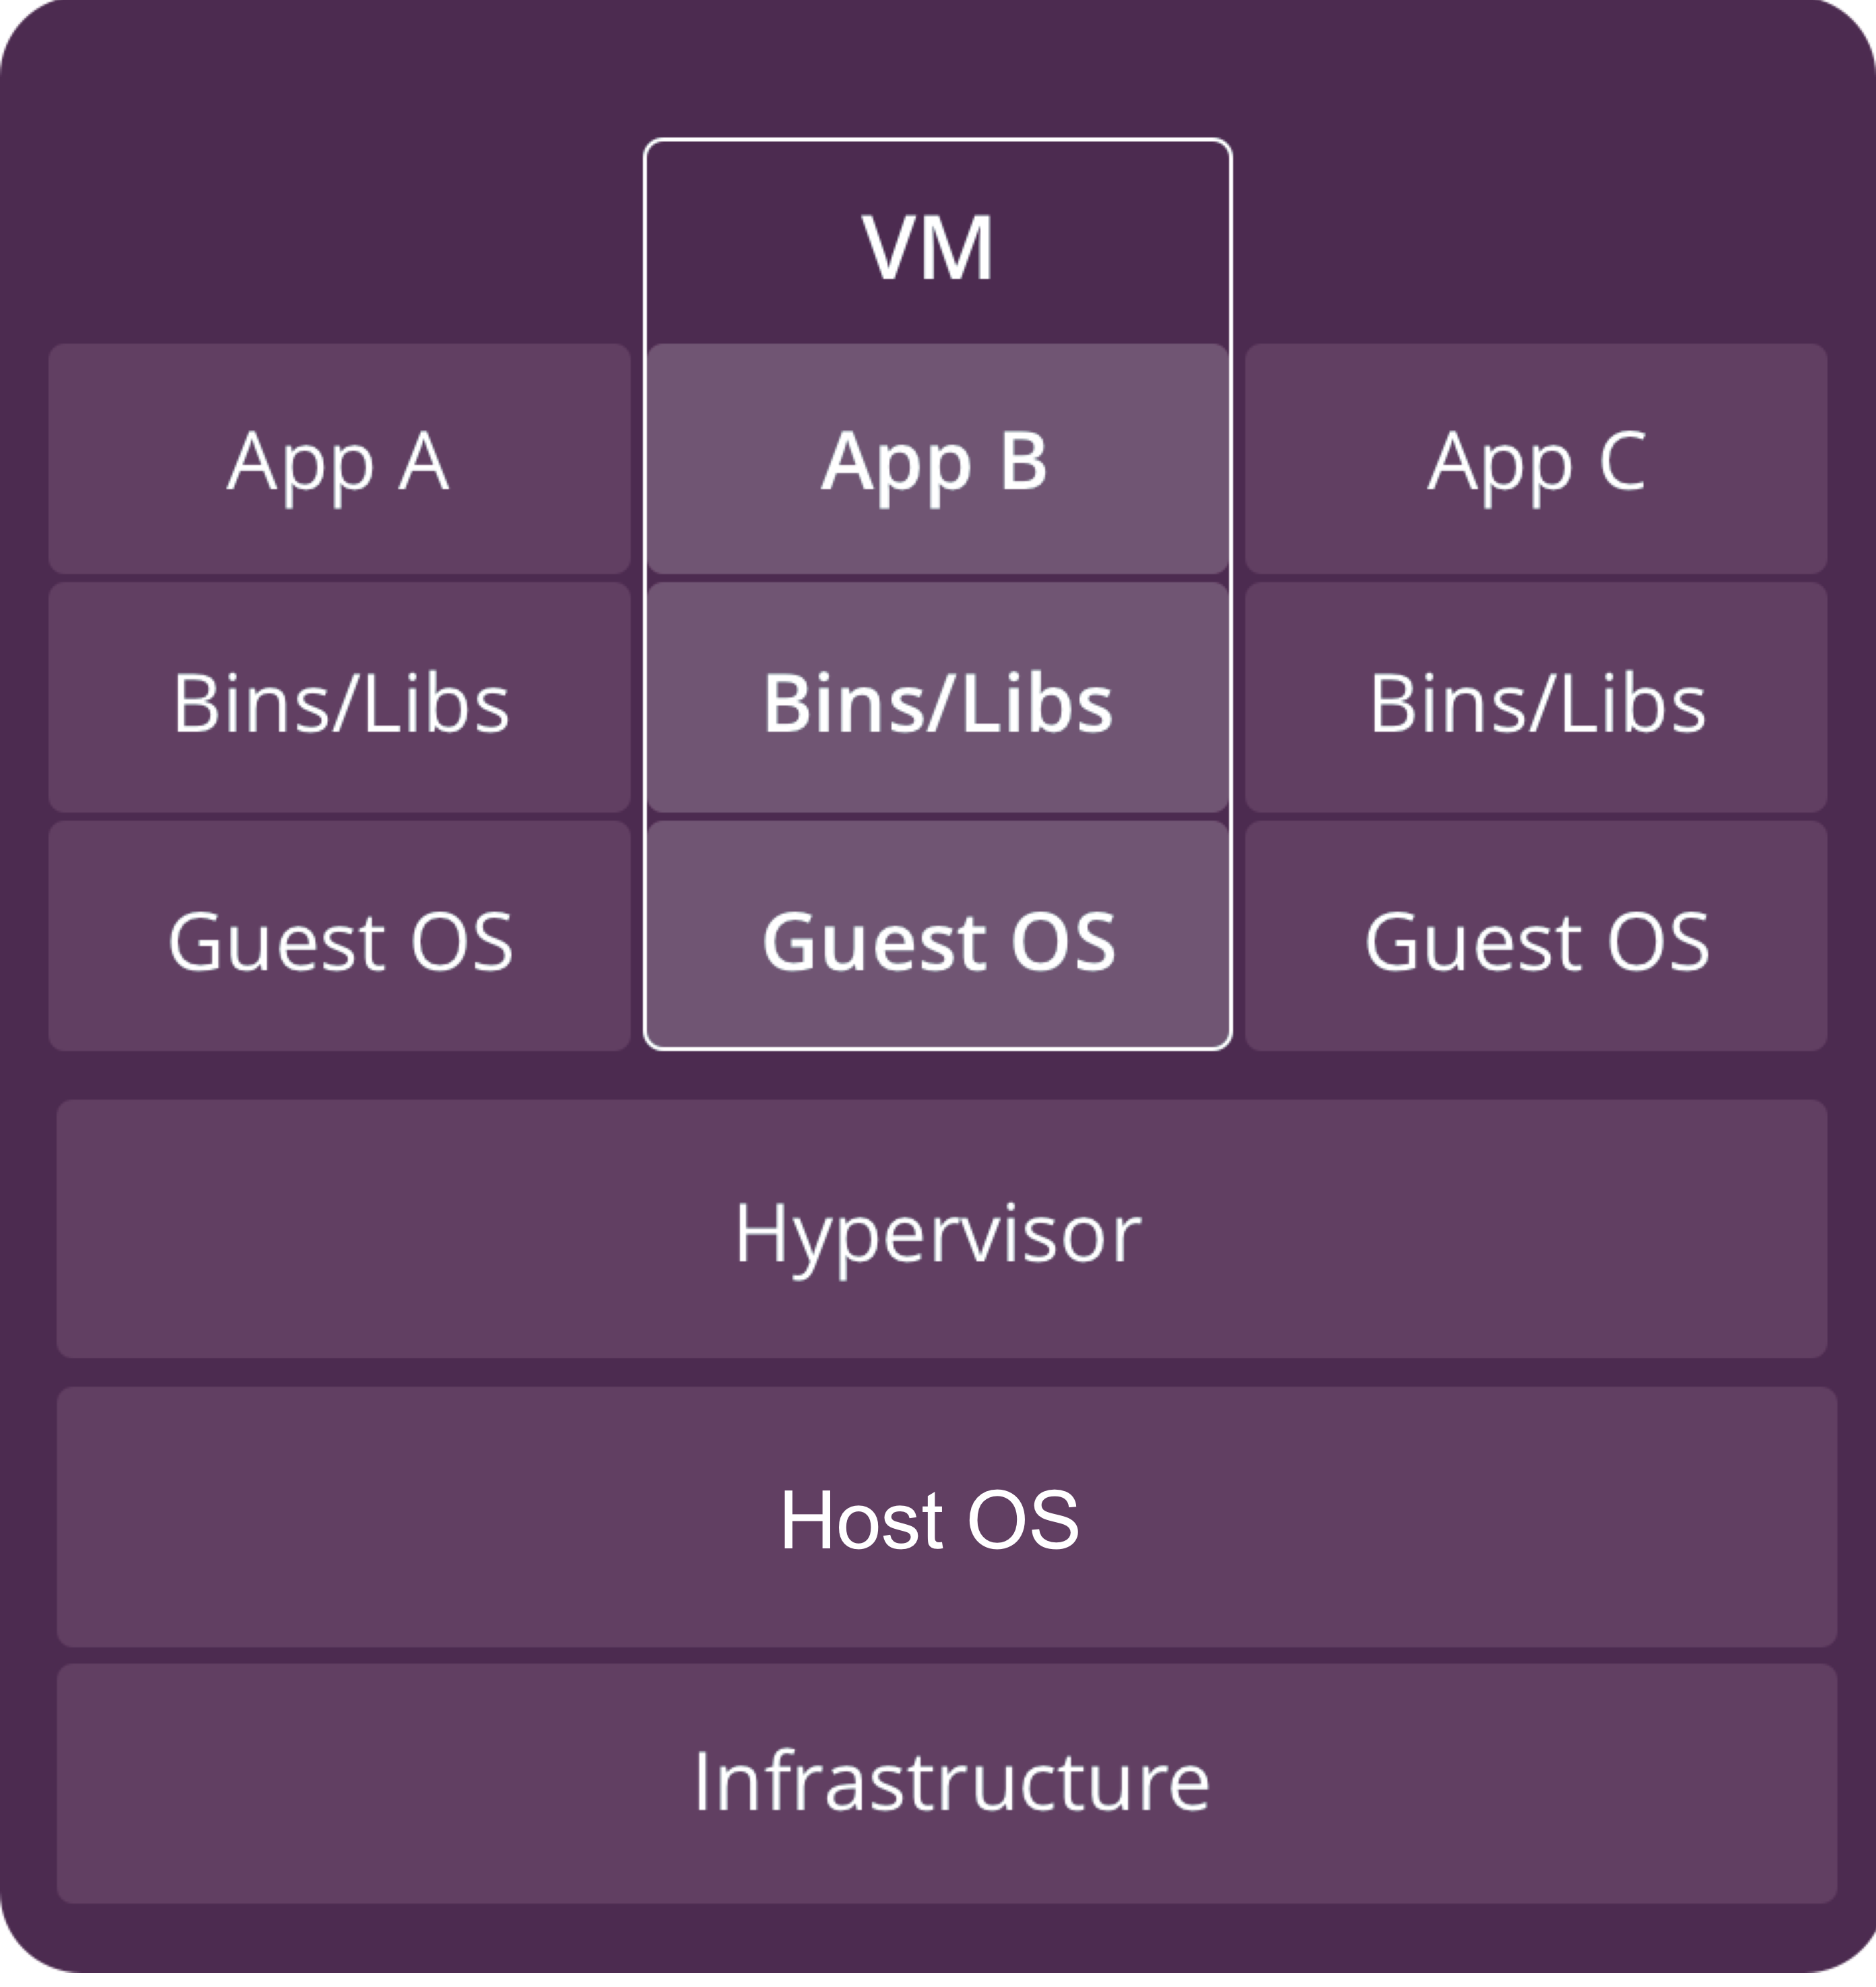

#### Containers?

With containers, instead of virtualizing the underlying computer like a virtual machine (VM), just the OS is virtualized.

Containers sit on top of a physical server and its host OS — typically Linux or Windows. Each container shares the host OS kernel and, usually, the binaries and libraries, too.

[docker-layers.png](attachment:docker-layers.png)
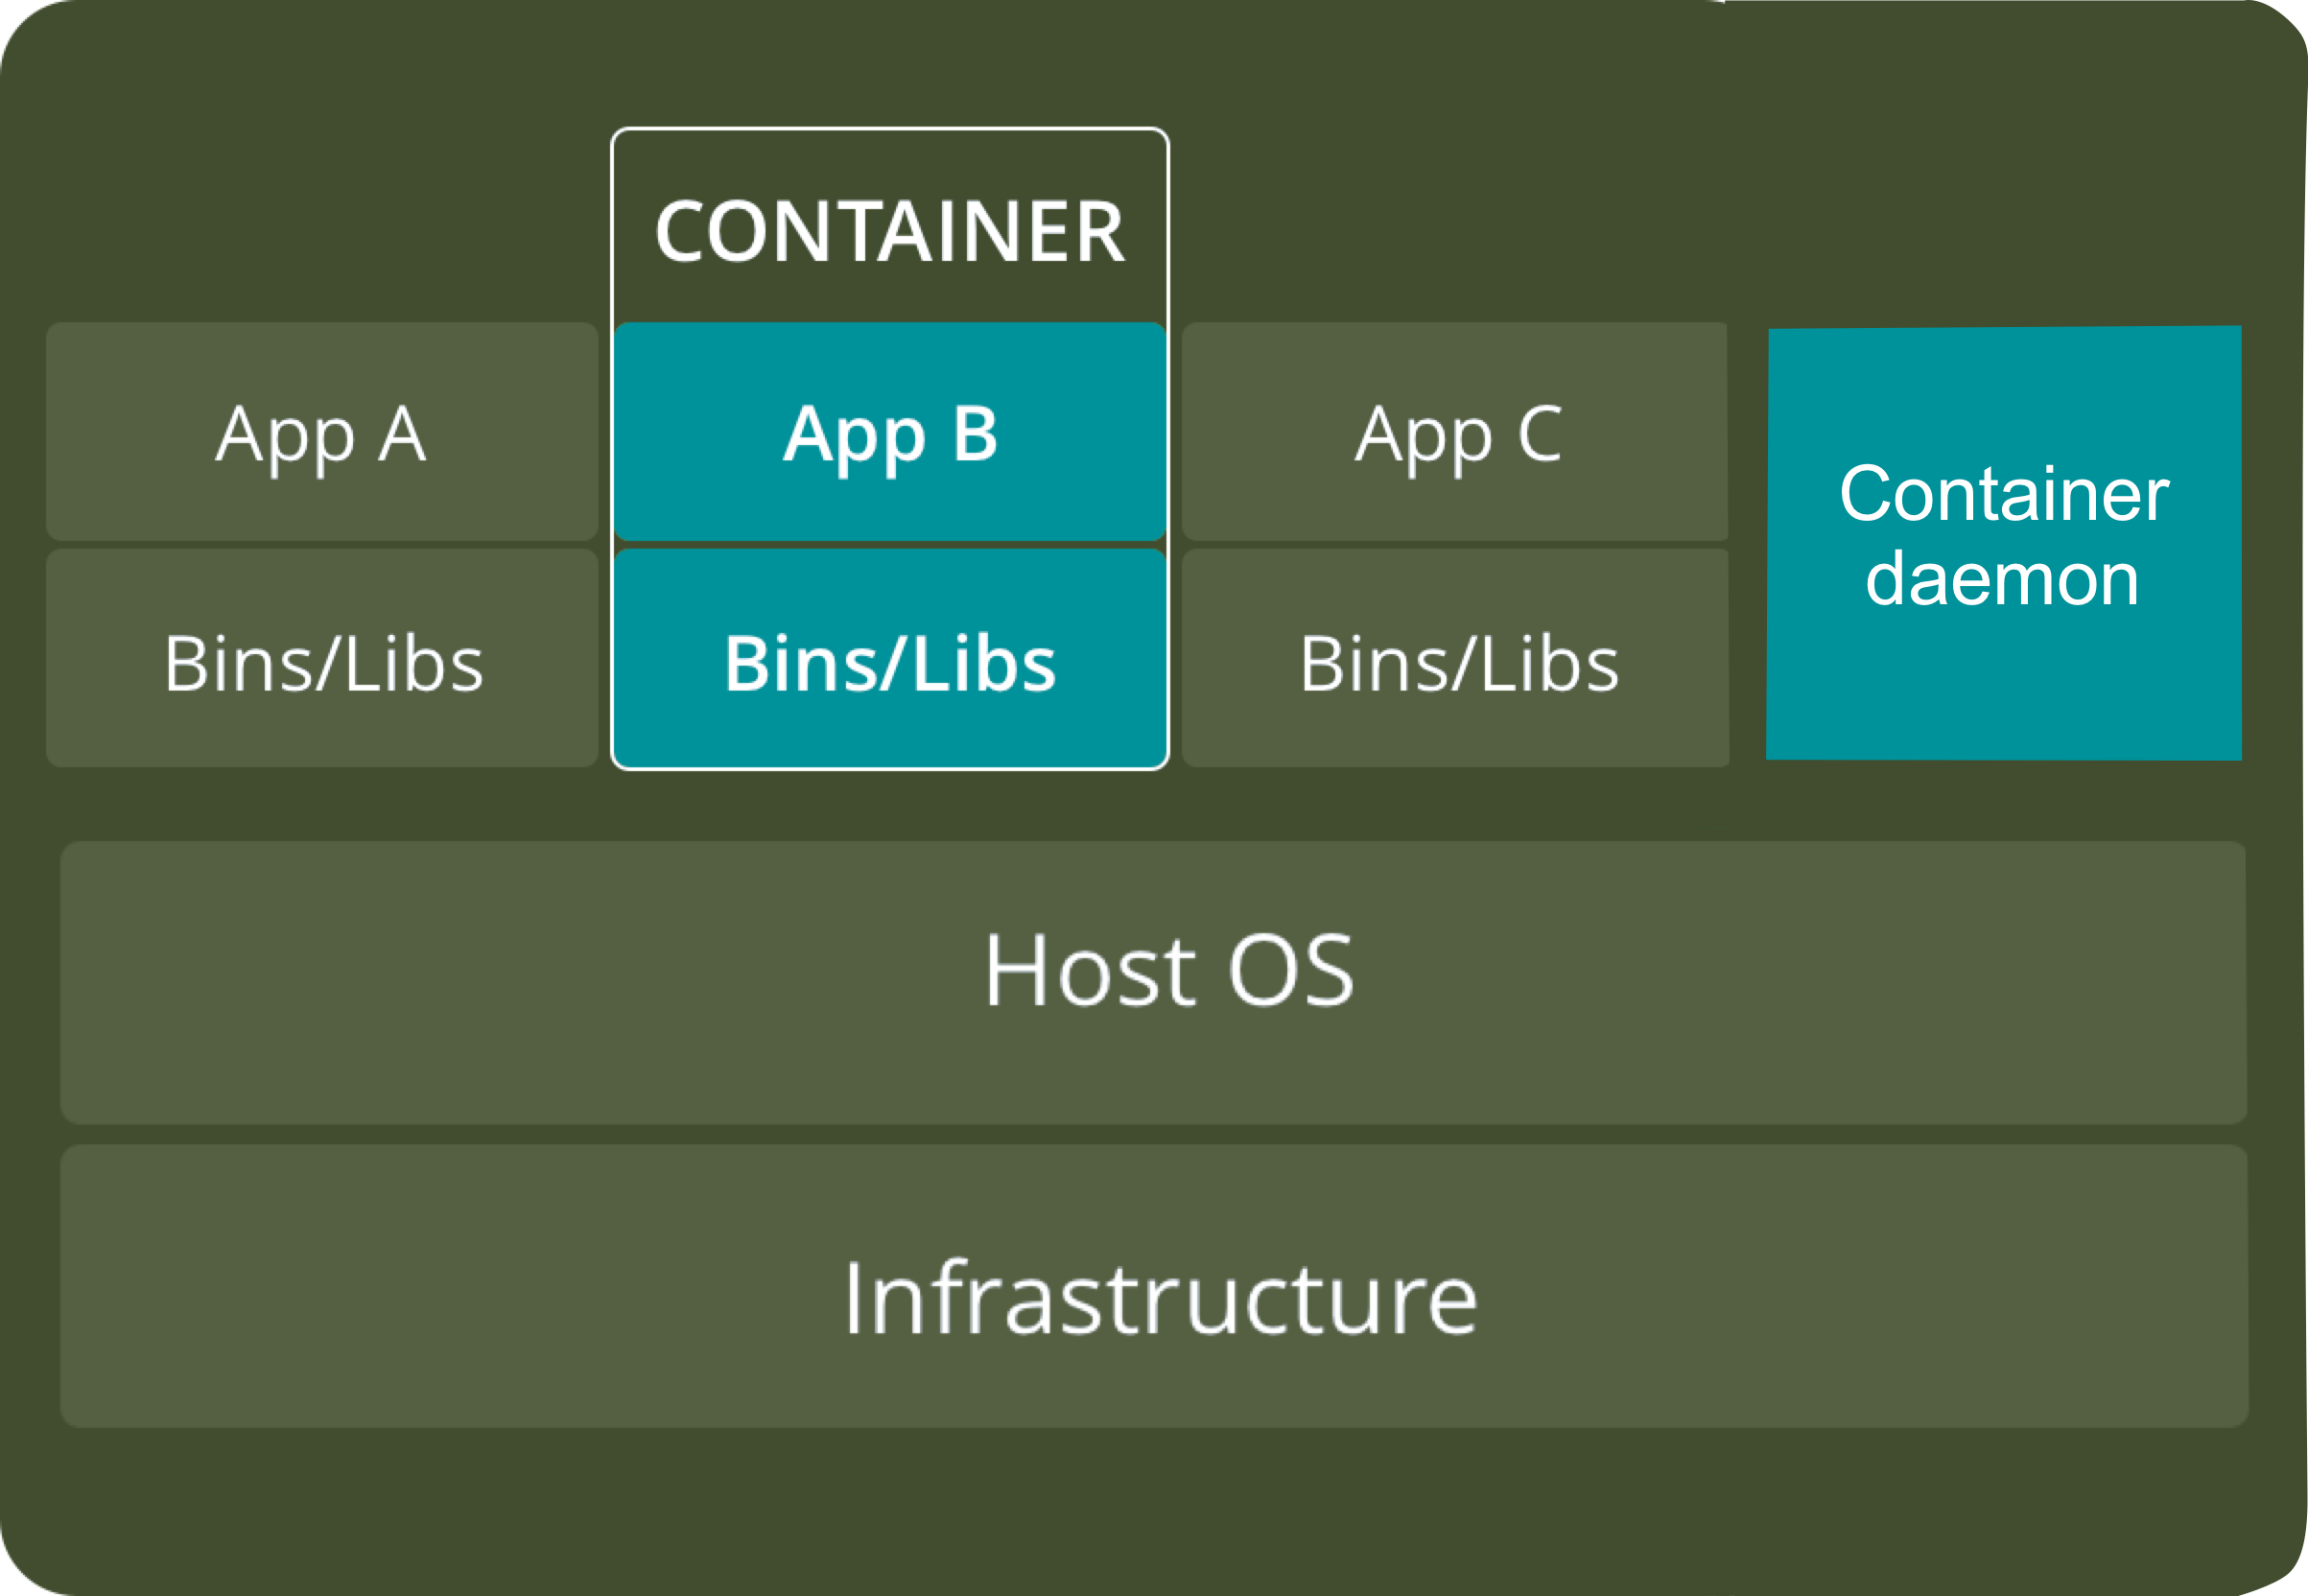

Containers are thus exceptionally light — they are only megabytes in size and take just seconds to start. 

In contrast to VMs, all that a container requires is enough of an operating system, supporting programs and libraries, and system resources to run a specific program. What this means in practice is you can put two to three times as many as applications on a single server with containers than you can with a VM. In addition, with containers you can create a portable, consistent operating environment for development, testing, and deployment.

_Docker_ started as a project to build single-application LXC containers, introducing several changes to LXC that make containers more portable and flexible to use. It later morphed into its own container runtime environment.

_A container image is a lightweight, stand-alone, executable package of a piece of software that includes everything needed to run it: code, runtime, system tools, system libraries, settings._
— _Official Docker website_


**Benefits of Containers**
- Reduced IT management resources
- Reduced size of snapshots
- Quicker spinning up apps
- Reduced & simplified security updates
- Less code to transfer, migrate, upload workloads


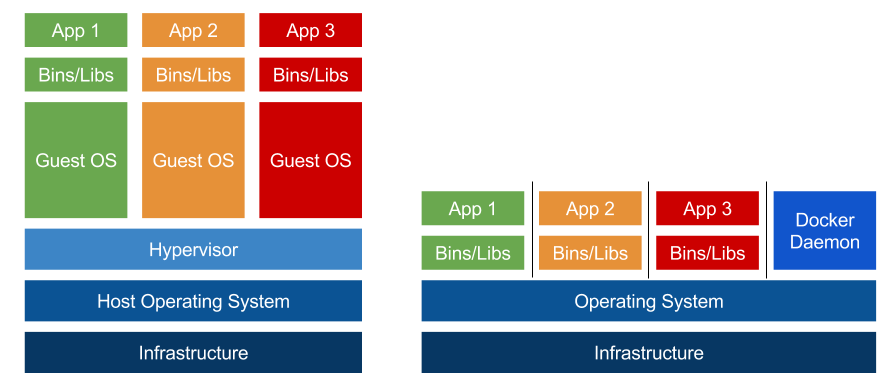

In [33]:
sleep 10

SyntaxError: invalid syntax (<ipython-input-33-dff6c8448b48>, line 1)

In [ ]:
%%html
<style>
table td, table th, table tr {text-align:center !important;}
</style>

<table>
    <tbody>
        <tr><td style="solid #b0b0b0;
            background-color: #ffffff;
            font-weight: bold;
            font-size: 1.2em;
            ">What’s the Diff: VMs vs Containers
        </td></tr>
        <tr style="border: 2px solid #b0b0b0;
                   background-color: #f8f8f8;">
        <td style="font-weight: bold;">VMs</td>
        <td style="font-weight: bold;">Containers</td>
        </tr>
        <tr><td> Heavyweight</td>
        <td>Lightweight</td></tr>
        <tr><td> Limited performance</td>
        <td>Native performance</td></tr>
        <tr><td> Each VM runs in its own OS</td>
        <td>All containers share the host OS</td></tr>
        <tr><td> Hardware-level virtualization</td>
        <td>OS virtualization</td></tr>
        <tr><td> Startup time in minutes</td>
        <td>Startup time in milliseconds</td></tr>
        <tr><td> Allocates required memory</td>
        <td>Requires less memory space</td></tr>
        <tr><td> Fully isolated and hence more secure</td>
        <td>Process-level isolation, possibly less secure</td></tr>
    </tbody>
</table>

For most, the ideal setup is likely to include both. With the current state of virtualization technology, the flexibility of VMs and the minimal resource requirements of containers work together to provide environments with maximum functionality.

If your organization is running a large number of instances of the same operating system, then you should look into whether containers are a good fit. They just might save you significant time and money over VMs.

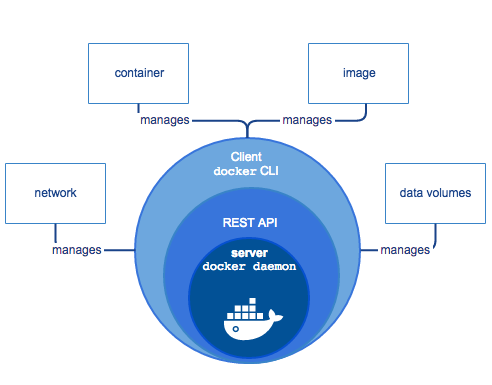

### Docker: Containers vs Images

Docker objects
When you use Docker, you are creating and using images, containers, networks, volumes, plugins, and other objects. This section is a brief overview of some of those objects.

#### IMAGES
An image is a **read-only template with instructions for creating a Docker container**. Often, an image is based on another image, with some additional customization. For example, you may build an image which is based on the ubuntu image, but installs the Apache web server and your application, as well as the configuration details needed to make your application run.

You might create your own images or you might only use those created by others and published in a registry. To build your own image, you create a Dockerfile with a simple syntax for defining the steps needed to create the image and run it. Each instruction in a Dockerfile creates a layer in the image. When you change the Dockerfile and rebuild the image, only those layers which have changed are rebuilt. This is part of what makes images so lightweight, small, and fast, when compared to other virtualization technologies.

In [ ]:
!docker images

#### CONTAINERS
A container is a runnable instance of an image. You can create, start, stop, move, or delete a container using the Docker API or CLI. You can connect a container to one or more networks, attach storage to it, or even create a new image based on its current state.

By default, a container is relatively well isolated from other containers and its host machine. You can control how isolated a container’s network, storage, or other underlying subsystems are from other containers or from the host machine.

A container is defined by its image as well as any configuration options you provide to it when you create or start it. When a container is removed, any changes to its state that are not stored in persistent storage disappear.



In [ ]:
!docker container ls


#### Docker Network

## BRIDGE
Docker creates a network interface to connect the container to a default network, since you did not specify any networking options, the container will connect to a bridge network. This includes assigning an IP address to the container. ~~By default, containers can connect to external networks using the host machine’s network connection.~~

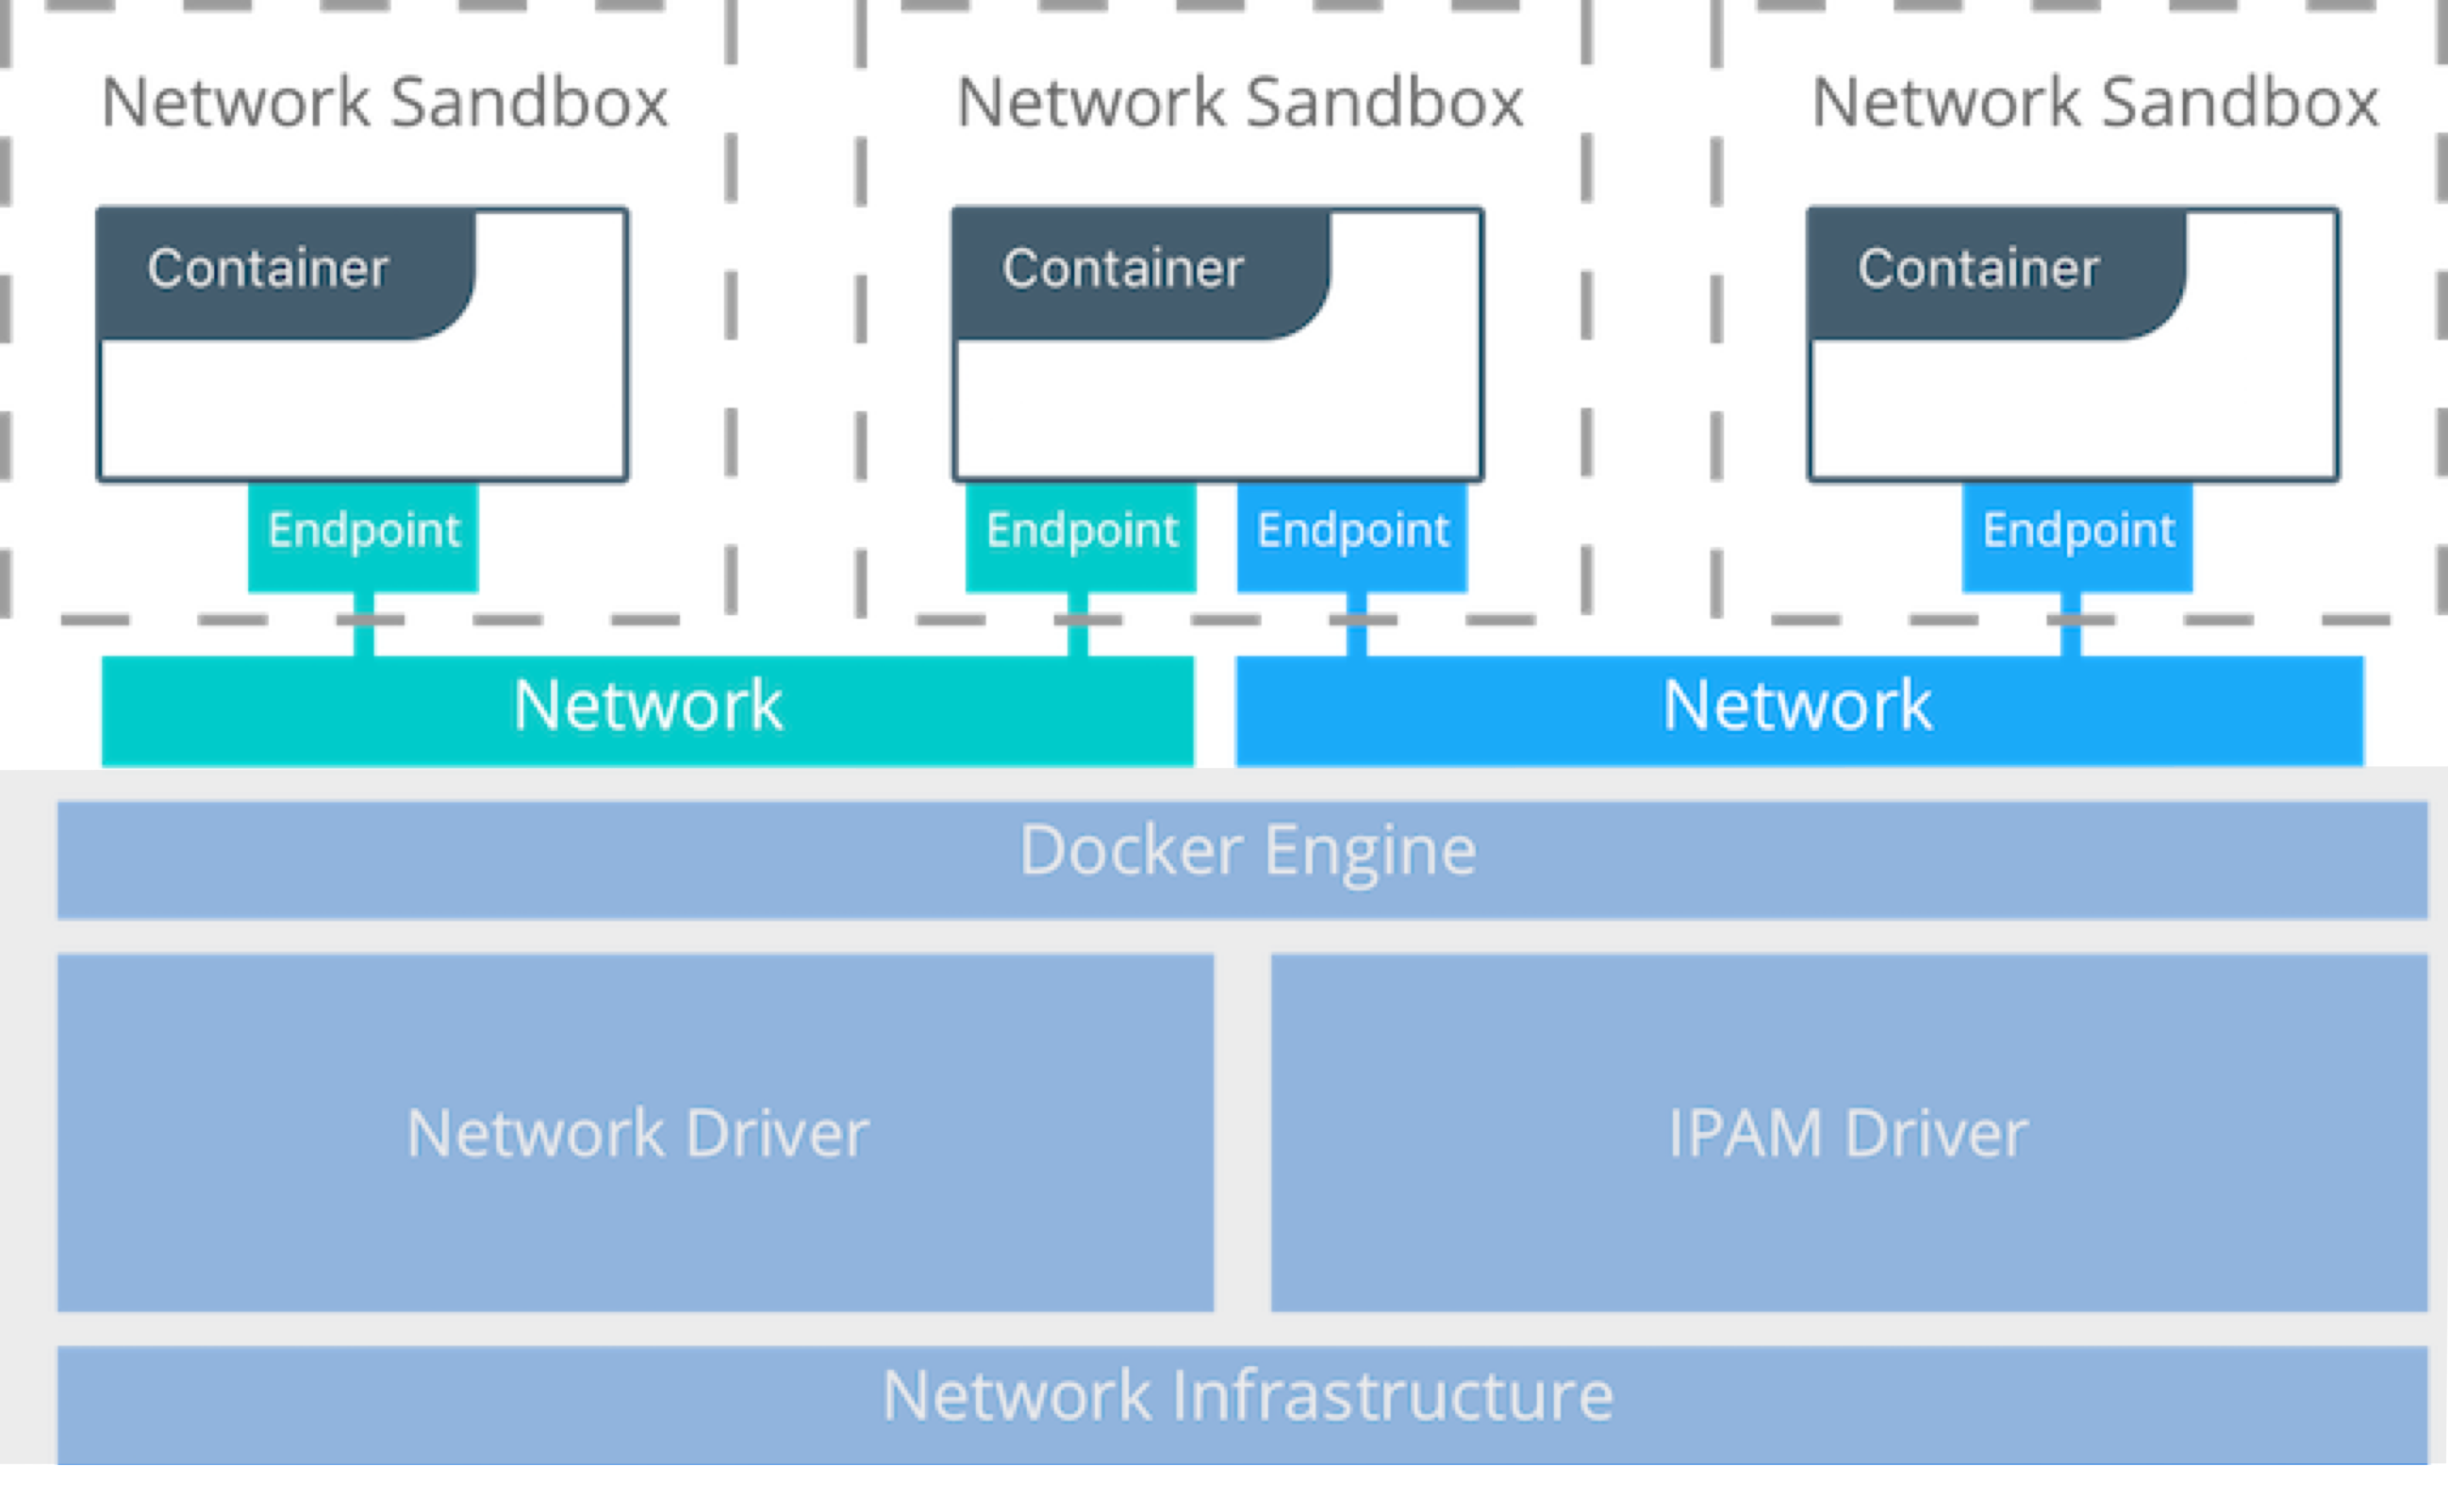

*Endpoint: An endpoint is a remote computing device that communicates back and forth with a network to which is it connected._

## HOST
Using host network, that container’s network stack will not be isolated from the Docker host. For example, if a service container binds to port 80, only one service container can run on a given swarm node (also in the host machine).
So in case you connect your container with a host network, it will not be isolated like in the image.

In [ ]:
!docker network ls

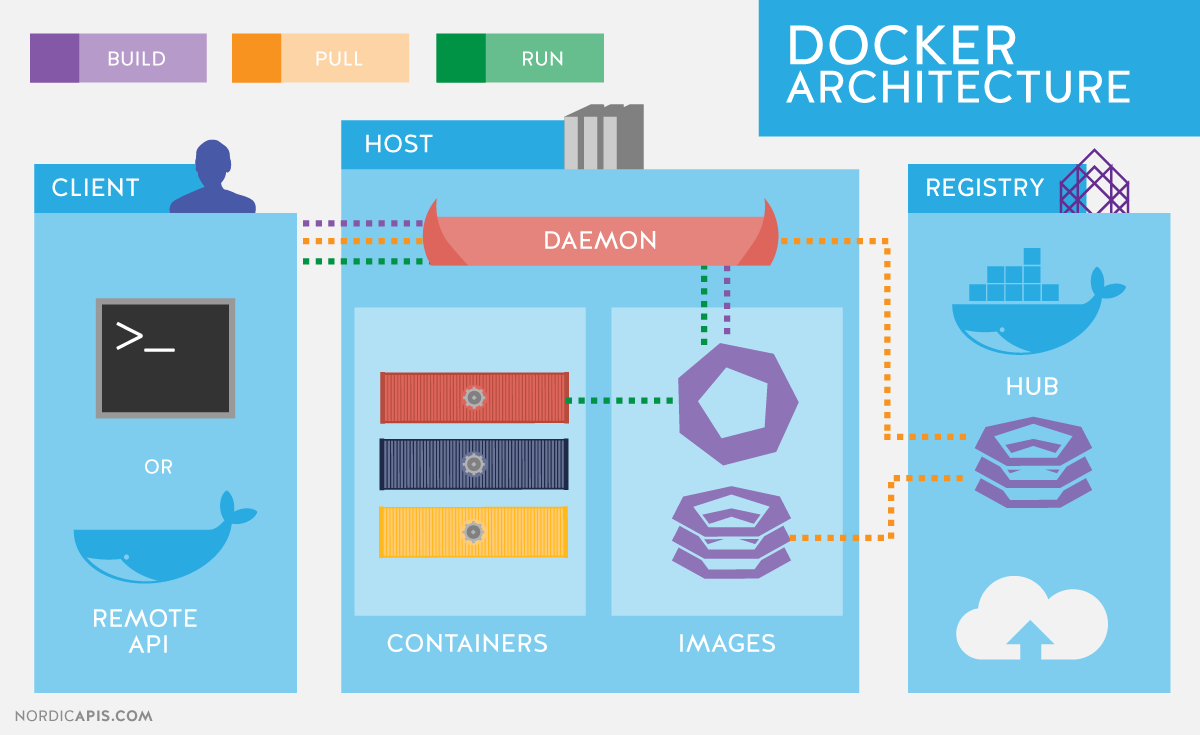

## Technical example
Source: 
    - https://docs.docker.com/engine/docker-overview/
    - https://docs.docker.com/get-started/part2/

In [ ]:
!docker run hello-world

In [ ]:
# The following command runs an ubuntu container,
# attaches interactively to your local command-line session,
# and runs /bin/bash 
!docker run -i -t ubuntu /bin/bash

#### Dockerfile

Dockerfile defines **what goes on in the environment inside your container**. Access to resources like **networking interfaces** and **disk drives** is virtualized inside this environment, which is isolated from the rest of your system, so you need to **map ports** to the outside world, and be specific about what **files you want** to “copy in” to that environment. However, after doing that, you can expect that the build of your app defined in this Dockerfile behaves exactly the same wherever it runs.

In [ ]:
!tree ..  # Double dot means previous directory

In [ ]:
# You need to have configured sublime text to see this command working.
!subl ../app

**Build the app**

In [ ]:
!docker image ls
!docker build --tag=friendly_docker ../app/
!docker image ls

**Run the app**

In [ ]:
!docker run -p 4000:80 friendly_docker

Selected documentation and bibliography:
- https://blog.sourcerer.io/a-crash-course-on-docker-learn-to-swim-with-the-big-fish-6ff25e8958b0
- https://www.backblaze.com/blog/vm-vs-containers/
- https://blog.mikesir87.io/2017/05/docker-is-not-a-hypervisor/
- https://docs.docker.com/get-started
- https://www.paloaltonetworks.com/cyberpedia/what-is-an-endpoint
- https://success.docker.com/article/networking
- https://www.aquasec.com/wiki/display/containers/Docker+Architecture'
- https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad
- https://medium.freecodecamp.org/expose-vs-publish-docker-port-commands-explained-simply-434593dbc9a3

Possible improvements:
- Summarize comparison VM vs Docker
- Research about assignment of hardware memory for docker containers.
- Research about snapshots and docker container snapshots.